In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('US-pumpkins.csv')
df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
df.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [4]:
pumpkins = df.loc[:, ['Package', 'Date', 'Low Price', 'High Price']]
pumpkins

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.00,280.00
1,24 inch bins,5/6/17,270.00,280.00
2,24 inch bins,9/24/16,160.00,160.00
3,24 inch bins,9/24/16,160.00,160.00
4,24 inch bins,11/5/16,90.00,100.00
...,...,...,...,...
1752,22 lb cartons,9/30/16,14.75,14.75
1753,36 inch bins,9/26/16,275.00,275.00
1754,36 inch bins,9/27/16,275.00,275.00
1755,36 inch bins,9/28/16,275.00,275.00


In [5]:
pumpkins['Month'] = pd.DatetimeIndex(pumpkins['Date']).month
pumpkins['Average_Price'] = (pumpkins['Low Price'] + pumpkins['High Price'])/2
pumpkins.drop('Date', axis = 1)
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [6]:
pumpkins.loc

In [7]:
pumpkins.loc[pumpkins['Package'].str.contains('1 1/9'), 'Average_Price'] = pumpkins['Average_Price']/(1 + 1/9)
pumpkins.loc[pumpkins['Package'].str.contains('1/2'), 'Average_Price'] = pumpkins['Average_Price']/(1/2)

In [8]:
pumpkins

,Package,Date,Low Price,High Price,Month,Average_Price
70,1 1/9 bushel cartons,9/24/16,15.00,15.0,9,13.50
71,1 1/9 bushel cartons,9/24/16,18.00,18.0,9,16.20
72,1 1/9 bushel cartons,10/1/16,18.00,18.0,10,16.20
73,1 1/9 bushel cartons,10/1/16,17.00,17.0,10,15.30
74,1 1/9 bushel cartons,10/8/16,15.00,15.0,10,13.50
...,...,...,...,...,...,...
1738,1/2 bushel cartons,9/30/16,15.00,15.0,9,30.00
1739,1/2 bushel cartons,9/30/16,13.75,15.0,9,28.75
1740,1/2 bushel cartons,9/30/16,10.75,15.0,9,25.75
1741,1/2 bushel cartons,9/30/16,12.00,12.0,9,24.00


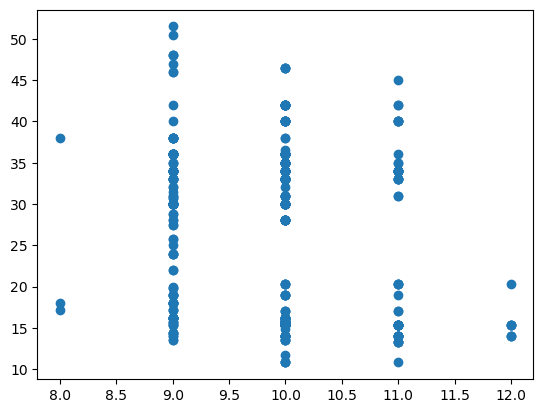

In [9]:
plt.scatter(pumpkins['Month'], pumpkins['Average_Price'])
plt.show()

Text(0, 0.5, 'Pumpkins Price per month')

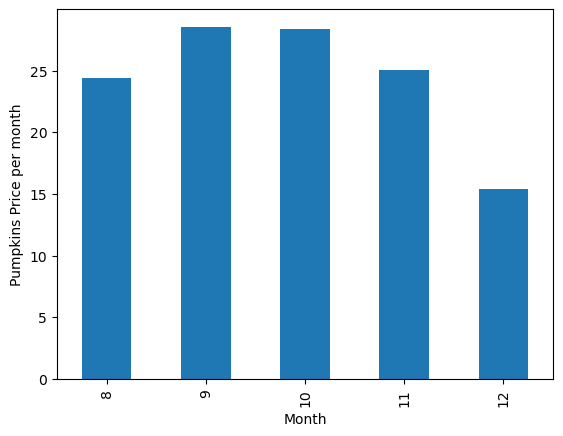

In [10]:
pumpkins.groupby(['Month'])['Average_Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkins Price per month')

In [12]:
from datetime import datetime
pumpkins['day_of_year'] = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

C:\Users\Lommy\AppData\Local\Temp\ipykernel_10300\709897846.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pumpkins['day_of_year'] = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
C:\Users\Lommy\AppData\Local\Temp\ipykernel_10300\709897846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumpkins['day_of_year'] = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


In [22]:
pumpkins.rename(columns={'Average_Price':'Price'}, inplace=True)
print(pumpkins['Month'].corr(pumpkins['Price']))
print(pumpkins['day_of_year'].corr(pumpkins['Price']))

-0.1491291363427862
-0.16690092505934478


C:\Users\Lommy\AppData\Local\Temp\ipykernel_10300\662825760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumpkins.rename(columns={'Average_Price':'Price'}, inplace=True)


In [37]:
df = df[df['Package'].str.contains('bushel', case=True, regex=False)]
df['DayOfYear'] = pd.to_datetime(df['Date']).apply(lambda dt: (dt-datetime(dt.year, 1, 1)).days)

df['Price'] = (df['Low Price'] + df['High Price'])/2
df.loc[df['Package'].str.contains('1 1/9'), 'Price'] = df['Price']/(1 + 1/9)
df.loc[df['Package'].str.contains('1/2'), 'Price'] = df['Price']/(1/2)

C:\Users\Lommy\AppData\Local\Temp\ipykernel_10300\4163038157.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DayOfYear'] = pd.to_datetime(df['Date']).apply(lambda dt: (dt-datetime(dt.year, 1, 1)).days)


In [38]:
df['Variety'].unique()

array(['PIE TYPE', 'MINIATURE', 'FAIRYTALE', 'MIXED HEIRLOOM VARIETIES'],
      dtype=object)

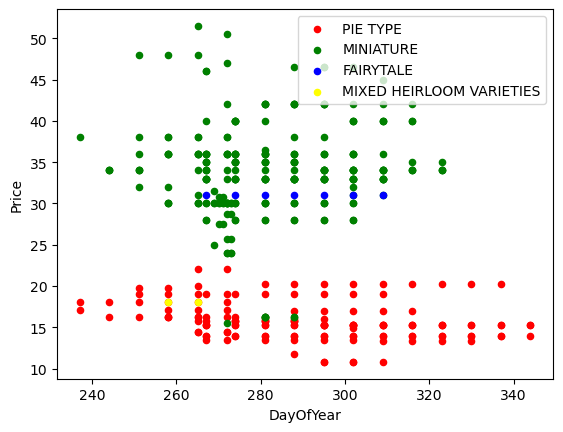

In [39]:
ax = None
colors = ['Red', 'Green', 'Blue','Yellow']
for i,var in enumerate(df['Variety'].unique()):
    df_pump = df[df['Variety'] == var]
    ax = df_pump.plot.scatter('DayOfYear','Price', ax=ax, c=colors[i], label=var)

Text(0, 0.5, 'Pumpkin Price per Variety')

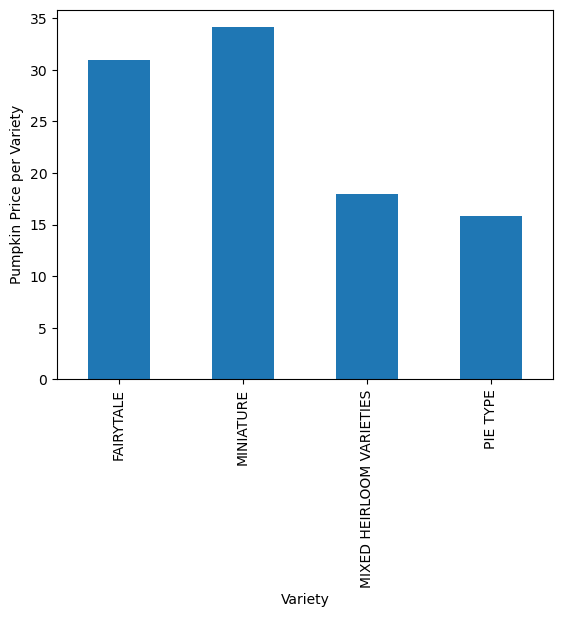

In [41]:
df.groupby('Variety')['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price per Variety')

<Axes: xlabel='DayOfYear', ylabel='Price'>

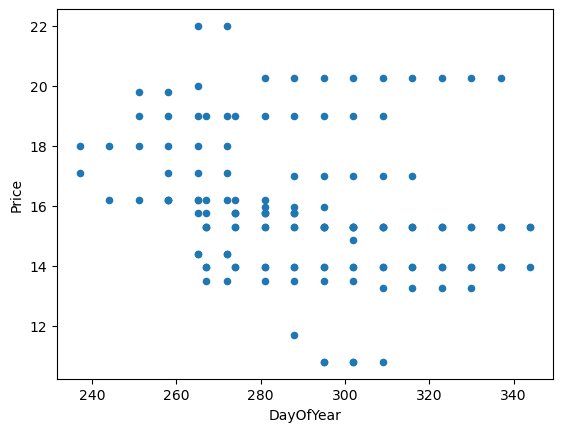

In [43]:
pie_pumpkins = df[df['Variety'] == 'PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear', 'Price')

In [44]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        0 non-null      object 
 1   Type             0 non-null      object 
 2   Package          0 non-null      object 
 3   Variety          0 non-null      object 
 4   Sub Variety      0 non-null      object 
 5   Grade            0 non-null      float64
 6   Date             0 non-null      object 
 7   Low Price        0 non-null      float64
 8   High Price       0 non-null      float64
 9   Mostly Low       0 non-null      float64
 10  Mostly High      0 non-null      float64
 11  Origin           0 non-null      object 
 12  Origin District  0 non-null      object 
 13  Item Size        0 non-null      object 
 14  Color            0 non-null      object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     0 non-null      object 
 17  Quality          0 non-null      

C:\Users\Lommy\AppData\Local\Temp\ipykernel_10300\3144308612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)
